<a href="https://colab.research.google.com/github/saidelhasyim/E-Commerce-Product-Sales-Analysis/blob/main/MySkill_Final_Project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode


In [ ]:
# save data dalam bentuk data frame
data1 = pd.DataFrame (
                    #Memfilter data dengan valid=1 / sudah dilakukan pembayaran
                     df[(df['is_valid']==1) &
                    #Memfilter data dengan Category = Mobiles & Tablets
                      (df['category']=='Mobiles & Tablets') &
                      #Memfilter data pada transaksi selama 2022
                      ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                     #Mengelompokan data
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head()\
                     #Mereset nama header
                     .reset_index(name='qty_2022')\
                    )

data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

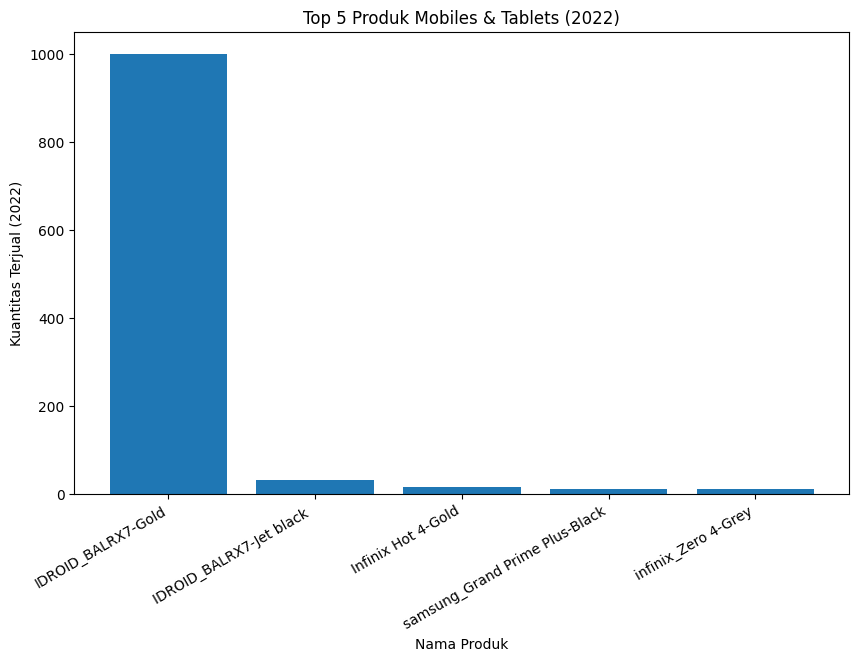

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data sku_name dan qty_2022 dari DataFrame data1
sku_names = data1['sku_name']
qty_2022 = data1['qty_2022']

# Membuat bar plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran figure
plt.bar(sku_names, qty_2022)

# Memberikan label pada sumbu x dan y
plt.xlabel('Nama Produk')
plt.ylabel('Kuantitas Terjual (2022)')

# Memberikan judul pada plot
plt.title('Top 5 Produk Mobiles & Tablets (2022)')

# Memutar label sumbu x agar mudah dibaca
plt.xticks(rotation=30, ha='right')

# Menampilkan plot
plt

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode


In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data2 = pd.DataFrame(
                     #Memfilter data dengan valid=1 / sudah dilakukan pembayaran
                     df[(df['is_valid']==1) &
                     #Memfilter data pada transaksi selama 2022
                     ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]
                     #Mengelompokan data
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_2021')\
                     )
data2

,category,qty_2021
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data3 = pd.DataFrame(
                     #Memfilter data dengan valid=1 / sudah dilakukan pembayaran
                     df[(df['is_valid']==1) &
                     #Memfilter data pada transaksi selama 2022
                     ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]
                     #Mengelompokan data
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_2022')\
                     )
data3

,category,qty_2022
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


In [ ]:
data4 = data2.merge(data3, on  = 'category', how = 'outer' )
data4

,category,qty_2021,qty_2022
0,Appliances,124,148
1,Beauty & Grooming,168,153
2,Books,171,195
3,Computing,109,153
4,Entertainment,77,150
5,Health & Sports,173,200
6,Home & Living,193,250
7,Kids & Baby,170,227
8,Men Fashion,237,175
9,Mobiles & Tablets,107,1154


In [ ]:
#growth / selisih
data4 ['qty_growth']=data4['qty_2022']-data4['qty_2021']
data4.sort_values(by=['qty_growth'],ascending=False,inplace=False)
data4

,category,qty_2021,qty_2022,qty_growth
9,Mobiles & Tablets,107,1154,1047
14,Women Fashion,140,489,349
13,Superstore,327,536,209
4,Entertainment,77,150,73
6,Home & Living,193,250,57
7,Kids & Baby,170,227,57
11,School & Education,184,237,53
3,Computing,109,153,44
5,Health & Sports,173,200,27
0,Appliances,124,148,24


In [ ]:
#2.1 Syntax 2.0

# Memfilter data dengan valid = 1
df_valid = df[df['is_valid'] == 1]

# Memfilter data pada transaksi selama 2021 dan 2022
df_2021 = df_valid[df_valid['order_date'].dt.year == 2021]
df_2022 = df_valid[df_valid['order_date'].dt.year == 2022]

# Gunakan groupby berdasarkan category untuk masing-masing tahun
df_grouped_2021 = df_2021.groupby('category')['qty_ordered'].sum().reset_index()
df_grouped_2022 = df_2022.groupby('category')['qty_ordered'].sum().reset_index()

# Menggabungkan kedua data dengan merge
df_merged = pd.merge(df_grouped_2021, df_grouped_2022, on='category', suffixes=('_2021', '_2022'))

# Lakukan pengurangan kolom qty 2022 dengan qty 2021 untuk melihat perbedaan
df_merged['Hasil_penurunan'] = df_merged['qty_ordered_2022'] - df_merged['qty_ordered_2021']

# Menampilkan perbedaan qty untuk setiap kategori
print(df_merged.sort_values(by='Hasil_penurunan', ascending=True))

              category  qty_ordered_2021  qty_ordered_2022  Hasil_penurunan
10              Others               426               263             -163
12             Soghaat               759               612             -147
8          Men Fashion               237               175              -62
1    Beauty & Grooming               168               153              -15
0           Appliances               124               148               24
2                Books               171               195               24
5      Health & Sports               173               200               27
3            Computing               109               153               44
11  School & Education               184               237               53
6        Home & Living               193               250               57
7          Kids & Baby               170               227               57
4        Entertainment                77               150               73
13          

## `Jawaban No 2.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode


In [ ]:
#2.2 Syntax

# Memfilter data kategori "Others" untuk tahun 2021 dan 2022
df_2021_others = df_2021[df_2021['category'] == 'Others']
df_2022_others = df_2022[df_2022['category'] == 'Others']

# Gunakan groupby berdasarkan sku_name untuk masing-masing tahun dalam kategori "Others"
df_grouped_2021_others = df_2021_others.groupby('sku_name')['qty_ordered'].sum().reset_index()
df_grouped_2022_others = df_2022_others.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Menggabungkan kedua data dengan merge berdasarkan sku_name
df_merged_others = pd.merge(df_grouped_2021_others, df_grouped_2022_others, on='sku_name', suffixes=('_2021', '_2022'))

# Menghitung perbedaan qty penjualan dari tahun 2021 ke 2022
df_merged_others['qty_diff'] = df_merged_others['qty_ordered_2022'] - df_merged_others['qty_ordered_2021']

# Mengurutkan berdasarkan penurunan penjualan tertinggi dan mengambil TOP 20
df_top_others = df_merged_others.sort_values(by='qty_diff').head(20)

print(df_top_others[['sku_name', 'qty_diff']])

                                             sku_name  qty_diff
7                       RB_Dettol Germ Busting Kit-bf      -155
8                                 Telemall_MM-DR-HB-L       -21
16                                    kansai_NeverWet        -9
14                                         emart_00-1        -6
5                                      MEGUIAR_G12711        -3
0                                  Aladdin_bike_cover        -1
11            aw_Ultra Shine Wash & Wax-64oz./1893ml         -1
9                                     Tmall_MM-DR-PAD        -1
2   Entertainer Asia_Vouch 365-2017 Mobile App Lahore        -1
4                                       MEGUIAR_A1214         0
3                                       Lacie_9000146         0
12                                 electro_Humidifier         0
10                         aw_CONSTRUCTION FOAM-700ml         1
1      Entertainer Asia_Vouch 365 - 2017 Book Karachi         1
6                                      M

**Summary** : Terdapat beberapa item ............., sehingga bisa memungkinan ...........


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
#Menyimpan data dalam bentuk Pandas DataFrame
data3 = df[\
            #Memfilter data dengan gross=1
            (df['is_gross']==1) &\
            #Memfilter data dengan valid=0
            (df['is_valid']==0) &\
            #Memfilter data dengan net=0
            (df['is_net']==0) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
data3_1 = data3[['customer_id','registered_date']].drop_duplicates()
data3_1

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [ ]:
from google.colab import files
data3_1.to_csv('data_list.csv', encoding = 'utf-8-sig',index=False)
files.download('data_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thursday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11


In [ ]:
data_10 = pd.DataFrame(df[
            #filter is_valid = 1
            (df['is_valid']==1) \
            #filter variabel weekend
            & (df['day'].isin(['Saturday','Sunday'])) \
            #filter tahun 2022
            & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')] \
             #group berdasarkan month dan average / rata-rata
             .groupby(["month_num","month"])["before_discount"].mean()\
             #pembulatan
             .round()\
             #urutkan berdasarkan value dr descending
            .sort_values(ascending=False)\
             #reset index menjadi weekend
            .reset_index(name='avg_sales_weekend'))
data_10


,month_num,month,avg_sales_weekend
0,10,October,634260.0
1,11,November,607794.0
2,12,December,410599.0


In [ ]:
data_11 = pd.DataFrame(df[
            #filter is_valid = 1
            (df['is_valid']==1) \
            #filter variabel weekend
            & (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) \
            #filter tahun 2022
            & (df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31')] \
             #group berdasarkan month dan average / rata-rata
             .groupby(["month_num","month"])["before_discount"].mean()\
             #pembulatan
             .round()\
             #urutkan berdasarkan value dr descending
            .sort_values(ascending=False)\
             #reset index menjadi weekend
            .reset_index(name='avg_sales_weekdays'))
data_11


,month_num,month,avg_sales_weekdays
0,10,October,874690.0
1,12,December,813574.0
2,11,November,641862.0


In [ ]:
data12 = data_10.merge(data_11, left_on = 'month', right_on = 'month')
data12.sort_values(by='month_num_x',ascending=True,inplace=True)
data12 = data12[["month","avg_sales_weekend","avg_sales_weekdays"]]
data12

,month,avg_sales_weekend,avg_sales_weekdays
0,October,634260.0,874690.0
1,November,607794.0,641862.0
2,December,410599.0,813574.0


<Axes: xlabel='Category', ylabel='Total'>

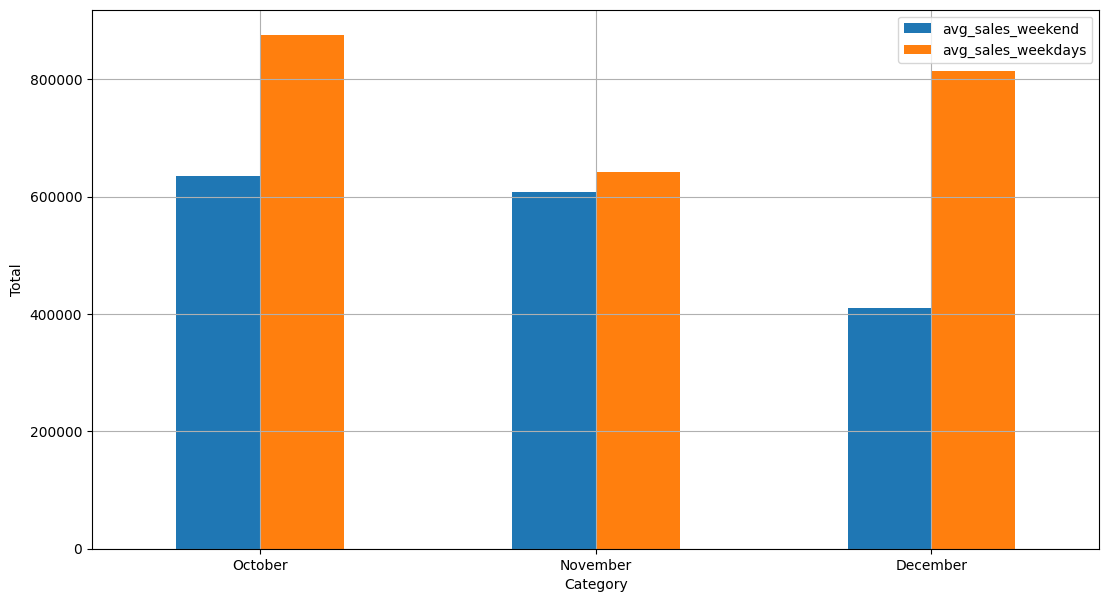

In [ ]:
#Buat Grafik
data12.plot(x='month',
           y=['avg_sales_weekend','avg_sales_weekdays'],
           kind='bar',
           grid = True,
           xlabel = 'Category',
           ylabel = 'Total',
           figsize = (13,7),
           rot = 0,
           table = False,
           secondary_y = False)

## `Jawaban No 4.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#weekend
data13 = df[\
            #filter is_valid = 1
            (df['is_valid']==1) &\
            #filter variabel weekend
            (df['day'].isin(['Saturday','Sunday'])) &\
            #filter tahun 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#weekdays
data14 = df[\
            #filter is_valid = 1
            (df['is_valid']==1) &\
            #filter variabel weedays
            (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) &\
            #filter tahun 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [ ]:
data15 = {\
          'Periode' :'Total 3 months',\
          'AVG Weekend Sales' : round(data13['before_discount'].mean(),2),\
          'AVG Weekdays Sales' : round(data14['before_discount'].mean(),2),\
          'Differents (Value)' : round(data13['before_discount'].mean() - data14['before_discount'].mean(),2), \
          'Differents (%)' : pd.Series(round(((data13['before_discount'].mean() - data14['before_discount'].mean())/data13['before_discount'].mean())*100,2), dtype=str)+'%'
          }

pd.DataFrame(data=data15, index=[0])

,Periode,AVG Weekend Sales,AVG Weekdays Sales,Differents (Value),Differents (%)
0,Total 3 months,558865.15,770146.01,-211280.86,-37.81%
